# Kingston Housing Regression 

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [65]:
#Import basic dependencies
import pandas as pd 
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [66]:
#Load dataset
df = pd.read_csv('/home/sauraj/Desktop/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [67]:
#Data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [68]:
#Basic data description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
#Drop useless features 
drop_cols = ["id","date"]
for cols in drop_cols:
    df = df.drop(cols, axis=1)

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


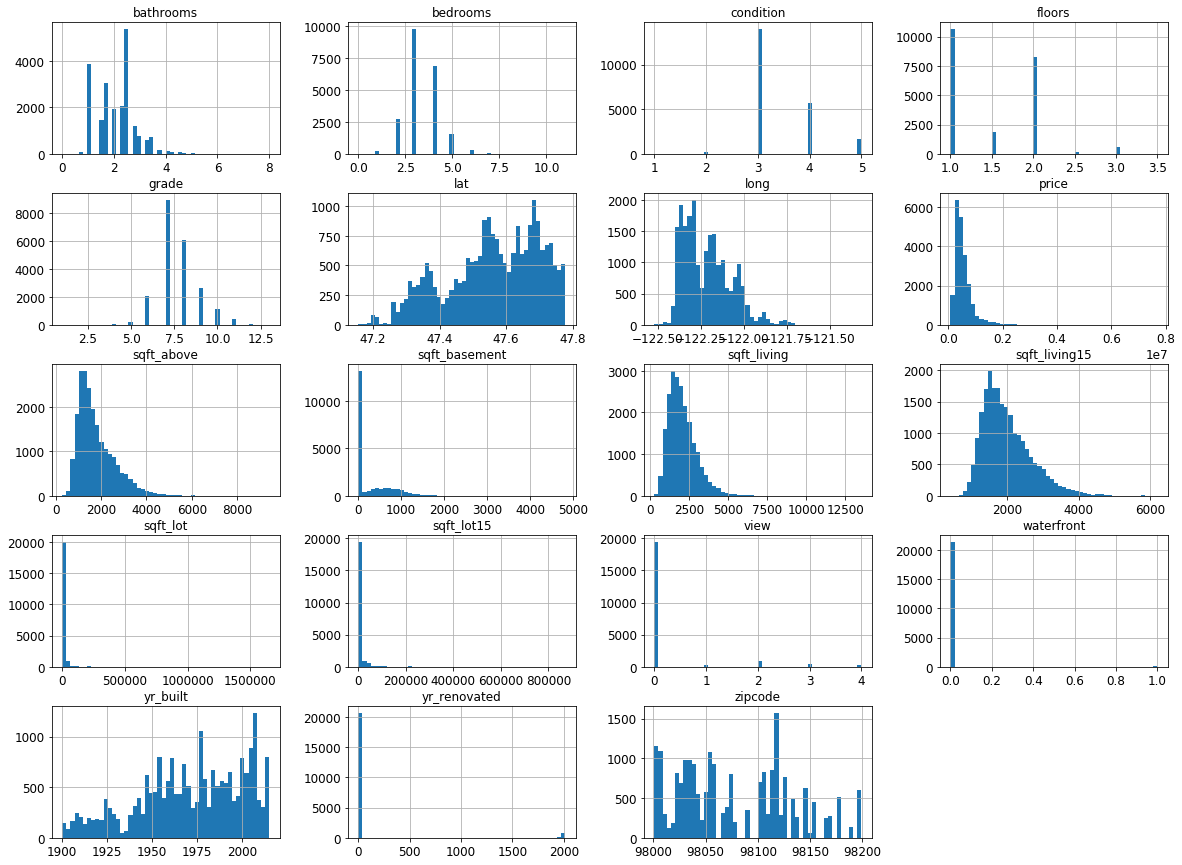

In [71]:
#Histogram plot to see all features properly
df.hist(bins=50, figsize=(20,15))
plt.show()

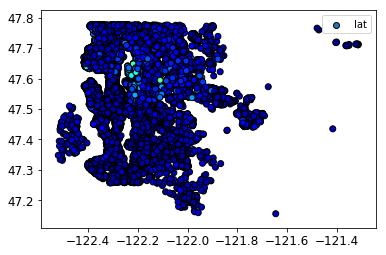

In [72]:
#Geographic representation of housing prices
plt.scatter(df.long, df.lat, edgecolor='black',c=df.price, cmap=plt.get_cmap("jet"))
plt.legend()

# Data Preprocessing & Feature Engineering

##### Bathrooms and floors can be easily rounded off to the nearest decimal place. Normal convention would be to convert their datatype to "int64", but its better to retain the origian datatype for memory management purposes

In [73]:
#Round off bathrooms and floors to their nearest decimal place
df['bathrooms'] = df['bathrooms'].round()
df['floors'] = df['floors'].round()

##### Next, outliers have to be removed and imputed with the median value for continuous features and mode for discrete features

In [74]:
#One of the observations has a bedroom count of 33. Which home in the world has 33 bedrooms!?
#df.loc[df['bedrooms'] == 33] = 3
#df.loc[df['bedrooms'] == 11] = 3

##### The next question which arises is that some houses were never viewed before they were bought, whereas some houses were viewed. Is there a price difference which causes consumers to actually visit the house more than other price ranged houses?

In [75]:
#Is the median price of unobserved houses different than those of observed houses
observed_houses = df.loc[df.view > 1]
unobserved_houses = df.loc[df.view < 1]

oh_median = np.median(observed_houses['price'])
unoh_median = np.median(unobserved_houses['price'])

print("Median house price of houses which were viewed = $",oh_median)
print("Median house price of houses which were not viewed = $", unoh_median)

Median house price of houses which were viewed = $ 769475.0
Median house price of houses which were not viewed = $ 432500.0


##### Houses which were viewed were having a much higher median price compared to non-viewed houses. One of the reasons why this might be true is that such houses were loaded with square footage values much greater than those of non-viewed houses, causing buyers to come and inspect the house just to be sure if buying it is worth the deal.

### Zipcodes have a unique problem as a lot of these zipcodes are arbitrary numbers which just specify the location of the house, but in a regression analysis, they can significantly impact the data analysis since their values can pose an imminent problem on the interpretation ot the regression model.

In [76]:
#First, segregate the zipcodes into various bins
df.zipcode.value_counts(bins=5)

(98000.80099999999, 98040.6]    7241
(98040.6, 98080.2]              5044
(98080.2, 98119.8]              4610
(98119.8, 98159.4]              2945
(98159.4, 98199.0]              1773
Name: zipcode, dtype: int64

In [77]:
#Segregate the zipcodes into their various bins
bins = [98000, 98040, 98080, 98120, 98160, 98200]
labels=[1,2,3,4,5]
df['zipcodes'] = pd.cut(df['zipcode'], bins=bins, labels=labels, include_lowest=True)

In [78]:
#Lastly, remove the original zipcode feature
df = df.drop(['zipcode'], axis=1)

In [79]:
#Then make the zipcodes into their respective dummy variables
df_dummies = pd.get_dummies(df['zipcodes'], prefix=['zipcoder'])
df = pd.concat([df, df_dummies], axis=1)

In [80]:
#Remove the "zipcodes" feature after obtaining the dummy variables
df = df.drop(['zipcodes'], axis=1)

In [81]:
#sqft_basement is redundant since it was already added to sqft_living
df['basement'] = df['sqft_basement'].apply(lambda x:1 if x > 0 else 0)

#yr_renovated can either become "renovated"
df['yr_renovated'] = df['yr_renovated'].apply(lambda x:1 if x > 0 else 0)

In [82]:
#Now remove sq_ft basement
df = df.drop(['sqft_basement'], axis=1)

### What does the preprocessed data look like now?

In [83]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,['zipcoder']_1,['zipcoder']_2,['zipcoder']_3,['zipcoder']_4,['zipcoder']_5,basement
0,221900,3,1.0,1180,5650,1.0,0,0,3,7,1180,1955,0,47.5112,-122.257,1340,5650,0,0,0,0,1,0
1,538000,3,2.0,2570,7242,2.0,0,0,3,7,2170,1951,1,47.7210,-122.319,1690,7639,0,0,0,1,0,1
2,180000,2,1.0,770,10000,1.0,0,0,3,6,770,1933,0,47.7379,-122.233,2720,8062,1,0,0,0,0,0
3,604000,4,3.0,1960,5000,1.0,0,0,5,7,1050,1965,0,47.5208,-122.393,1360,5000,0,0,0,1,0,1
4,510000,3,2.0,1680,8080,1.0,0,0,3,8,1680,1987,0,47.6168,-122.045,1800,7503,0,1,0,0,0,0
5,1225000,4,4.0,5420,101930,1.0,0,0,3,11,3890,2001,0,47.6561,-122.005,4760,101930,0,1,0,0,0,1
6,257500,3,2.0,1715,6819,2.0,0,0,3,7,1715,1995,0,47.3097,-122.327,2238,6819,1,0,0,0,0,0
7,291850,3,2.0,1060,9711,1.0,0,0,3,7,1060,1963,0,47.4095,-122.315,1650,9711,0,0,0,0,1,0
8,229500,3,1.0,1780,7470,1.0,0,0,3,7,1050,1960,0,47.5123,-122.337,1780,8113,0,0,0,1,0,1
9,323000,3,2.0,1890,6560,2.0,0,0,3,7,1890,2003,0,47.3684,-122.031,2390,7570,1,0,0,0,0,0


## What all have we done with the data?

* Encoded basement and year_renovated values to binary variables
* Divided zipcodes into various facets to allow for better model building
* Produced dummy variables of the zipcodes

### What needs to be done next?

* Fix skewness and bring normality for continuous data

##### What are the skewness levels of the continuous features?

In [84]:
#Check skewness of certain features 
import scipy
from scipy import stats
skew_features = ["sqft_above","sqft_living","sqft_living15","price", "sqft_lot","sqft_lot15"]

skewness = []
for features in skew_features:
    skew = scipy.stats.skew(df[skew_features])

skewness.append(skew)
print("Respective Skewness of each feature in skew_features :", skewness)

Respective Skewness of each feature in skew_features : [array([ 1.44656407,  1.47145329,  1.10810436,  4.02378986, 13.05911254,
        9.50608344])]


## Log-transformation to go

In [85]:
df['price'] = np.log1p(df['price'])
df['sqft_above'] = np.log1p(df['sqft_above'])
df['sqft_living'] = np.log1p(df['sqft_living'])
df['sqft_living15'] = np.log1p(df['sqft_living15'])
df['sqft_lot'] = np.log1p(df['sqft_lot'])
df['sqft_lot15'] = np.log1p(df['sqft_lot15'])

In [86]:
#Skewness check after log transformation (Should be between -1 to 1 to be acceptable)
new_skewness = []
for features in skew_features:
    skew = scipy.stats.skew(df[skew_features])

new_skewness.append(skew)
print("Respective Skewness of each feature in skew_features :", new_skewness)

Respective Skewness of each feature in skew_features : [array([ 0.25401641, -0.03472486,  0.20695002,  0.4280468 ,  0.962826  ,
        0.96718807])]


In [87]:
#Check for normality on continuous data rows using Kolmogorov-Smirnov 
from scipy import stats
print("KS statistic for price = ", stats.kstest(df.price, 'norm'))
print("KS statistic for sqft_above = ", stats.kstest(df.sqft_above, 'norm'))
print("KS statistic for sqft_living = ", stats.kstest(df.sqft_living, 'norm'))
print("KS statistic for sqft_living15 = ", stats.kstest(df.sqft_living15, 'norm'))
print("KS statistic for sqft_lot = ", stats.kstest(df.sqft_lot, 'norm'))
print("KS statistic for sqft_lot15 = ", stats.kstest(df.sqft_lot15, 'norm'))

KS statistic for price =  KstestResult(statistic=1.0, pvalue=0.0)
KS statistic for sqft_above =  KstestResult(statistic=0.9999999929973209, pvalue=0.0)
KS statistic for sqft_living =  KstestResult(statistic=0.9999999929973209, pvalue=0.0)
KS statistic for sqft_living15 =  KstestResult(statistic=0.9999999989602016, pvalue=0.0)
KS statistic for sqft_lot =  KstestResult(statistic=0.999999999802195, pvalue=0.0)
KS statistic for sqft_lot15 =  KstestResult(statistic=0.9999999999541522, pvalue=0.0)


In [88]:
#Renaming zipcode columns for XGBoost 
df = df.rename(index=str, columns={"['zipcoder']_1": "zipcode_1",
                             "['zipcoder']_2": "zipcode_2",
                             "['zipcoder']_3": "zipcode_3",
                             "['zipcoder']_4": "zipcode_4",
                             "['zipcoder']_5": "zipcode_5"})

In [89]:
df.to_csv('new_data.csv')

# Machine Learning model evaluations



### Now that the data has been pre-processed, our next goal is to work on skimming through all classifiers and get a first hand inference to their performance metrics with the help of Cross-validation.

* The data will be split into a **Train** and **Holdout** set. The **holdout** set is the set which will be used at the end for checking the model accuracy after all the work has been done.

* Model building and cross-validation will be done by further splitting the **Train** set into a **Training** and **Validation** set. This method allows us to have a model which wont have any data leakage and can be used to check on a true **out of sample** data; the **holdout set**


In [242]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [91]:
#Further split the train set to make a train and test split 
X = train_set.drop(['price'], axis=1)
y = train_set['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [92]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)

#Function to calculate various metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def training_error(X_train, y_train, model):
    train_predictions = model.predict(X_train)
    error = mean_squared_error(y_train, train_predictions)
    return error

def testing_error(X_test, y_test, model):
    test_predictions = model.predict(X_test)
    error = mean_squared_error(y_test, test_predictions)
    return error

def total_error(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = training_error(X_train, y_train, model)
    validation_error = testing_error(X_test, y_test, model)
    print("Training MSE on " + str(model),train_error)
    print("Testing MSE on" + str(model),validation_error)

total_error(X_train, y_train,X_test,y_test, linreg)

Training MSE on LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) 0.058867729596901786
Testing MSE onLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) 0.061193309487210176


##### The training set has a smaller MSE compared to testing set MSE. This was expected since the model will try to overfit at some areas and focus on achieving similar accuracy metrics

## Let's run K-fold cross-validation on the training set 

In [93]:
#K-fold cross-validation on testing set
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Instantiate the model
linreg = LinearRegression()

linreg_crossval = cross_val_score(linreg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

def scores(cvscores):
    print("Scores", cvscores)
    print("Average MSE", np.mean(np.abs(cvscores)))
    print("Average RMSE", np.sqrt(np.mean(np.abs(cvscores))))
    print("Standard Deviation", np.std(np.abs(cvscores)))
    
scores(linreg_crossval)

Scores [-0.06090371 -0.06226505 -0.06069234 -0.06366811 -0.05742584 -0.05471658
 -0.0558385  -0.05695076 -0.05711047 -0.06104739]
Average MSE 0.05906187615133037
Average RMSE 0.2430264926943776
Standard Deviation 0.002858038590924673


In [94]:
#Decision tree regressor 
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor()

dtreg_crossval = cross_val_score(dtreg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(dtreg_crossval)

Scores [-0.06424911 -0.07073218 -0.06007751 -0.0672426  -0.06102633 -0.0618665
 -0.06366606 -0.06755705 -0.06169947 -0.06981617]
Average MSE 0.06479329710581853
Average RMSE 0.2545452751590933
Standard Deviation 0.003609298899454947


In [95]:
#Support Vector Regressor 
from sklearn.svm import SVR

svreg = SVR(gamma='auto')

svreg_crossval = cross_val_score(svreg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(svreg_crossval)

Scores [-0.05657336 -0.05572363 -0.04936496 -0.06065401 -0.05274448 -0.05031329
 -0.05239966 -0.05176009 -0.05242275 -0.05851742]
Average MSE 0.054047364626478286
Average RMSE 0.23248089088455912
Standard Deviation 0.003478092099950864


In [96]:
#K-neighbors regressor 
from sklearn.neighbors import KNeighborsRegressor

knreg = KNeighborsRegressor()

knreg_crossval = cross_val_score(knreg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(knreg_crossval)

Scores [-0.09507192 -0.09976139 -0.09268276 -0.0999662  -0.09265854 -0.09105754
 -0.09407102 -0.08947759 -0.09131161 -0.10225942]
Average MSE 0.09483179829667882
Average RMSE 0.30794772007059706
Standard Deviation 0.004136600923431951


## Let's visualize the current residuals of the four models chosen above

In [97]:
#Functions to calculate the residuals and plot a residual graph and a predictor plot
def residuals(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", label = "Training data", edgecolor='black')
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", label = "Validation data", edgecolor='black')
    plt.xlabel("Log-Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.show()
    
def predictor(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.scatter(y_train_pred, y_train, c = "blue", label = "Training data", edgecolor='black')
    plt.scatter(y_test_pred, y_test, c = "lightgreen", label = "Validation data", edgecolor='black')
    plt.xlabel("Log-Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.show()

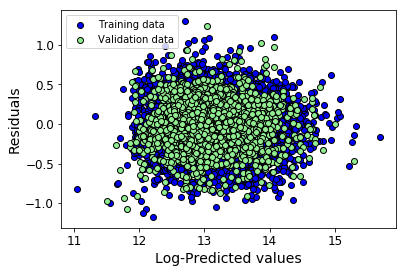

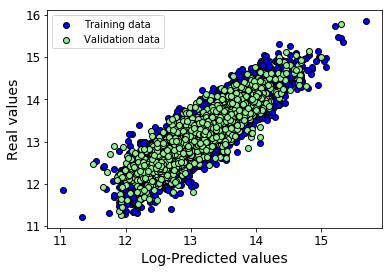

In [98]:
#Linear Regression
residuals(X_train, y_train, X_test, y_test, linreg)
predictor(X_train, y_train, X_test, y_test, linreg)

##### Decision tree regressor is clearly overfitting, so this model will be reconsidered later onwards

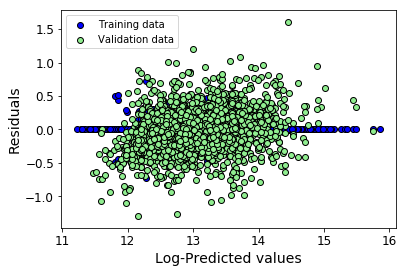

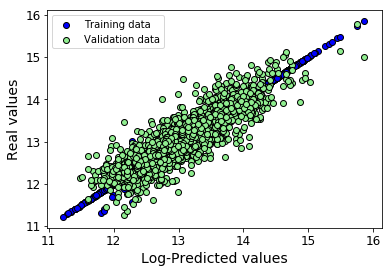

In [99]:
#DTRegressor
residuals(X_train, y_train, X_test, y_test, dtreg)
predictor(X_train, y_train, X_test, y_test, dtreg)

##### Support Vector Regressor seems to perform quite better compared to DTRegressor and Linreg

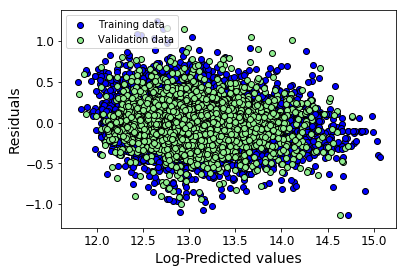

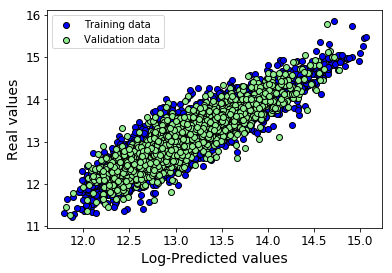

In [100]:
#SVRegressor
residuals(X_train, y_train, X_test, y_test, svreg)
predictor(X_train, y_train, X_test, y_test, svreg)

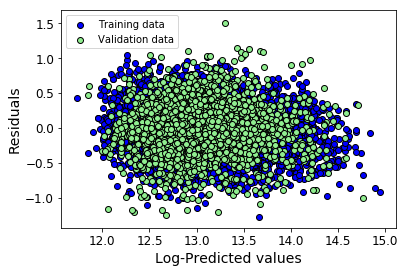

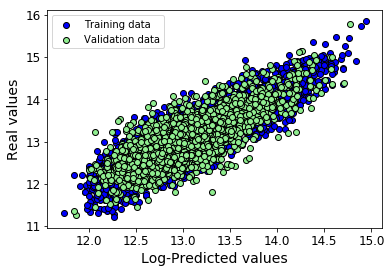

In [101]:
#KNRegressor
residuals(X_train, y_train, X_test, y_test, knreg)
predictor(X_train, y_train, X_test, y_test, knreg)

### Regularization can be performed next in order to remove overfitting and obtain better accuracy metrics. The two methods which will be used here are Ridge and Lasso. Since Ridge and Lasso are highly sensitive to outliers, hence it is better to use Kernel based methods to produce robust regression models

### Lasso with robust scaling

In [102]:
#Before Ridge can be applied, the data needs to be standardized to bring all the variables on the same scale
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso

#Robust Lasso 
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.005, random_state=1))
lasso_crossval = cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(lasso_crossval)

Scores [-0.06365147 -0.06459767 -0.06364872 -0.0648208  -0.05883413 -0.05830423
 -0.05916482 -0.06034192 -0.06104917 -0.06616847]
Average MSE 0.062058140265951925
Average RMSE 0.2491147130659928
Standard Deviation 0.002699367301482637


### Kernel ridge regression

Used to work as a robust regression approach and work around outliers.

In [103]:
#Kernel Ridge Regression 
krr = KernelRidge()
krr_crossval = cross_val_score(krr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(krr_crossval)

Scores [-0.0615339  -0.06344254 -0.06140395 -0.06448708 -0.05801401 -0.05602273
 -0.0564723  -0.05786502 -0.05803567 -0.06163367]
Average MSE 0.059891085725711
Average RMSE 0.244726552964142
Standard Deviation 0.0028192807889545852


### Elastic Net regression

Elastic net is a fusion of Ridge and lasso, combining L1 and L2 norms together to produce a better regularized model.

In [104]:
from sklearn.linear_model import ElasticNet
enet = make_pipeline(RobustScaler(), ElasticNet())
enet_crossval = cross_val_score(enet, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(enet_crossval)

Scores [-0.28508181 -0.26599646 -0.27325392 -0.27570658 -0.27162627 -0.28637096
 -0.26754256 -0.26864405 -0.27157897 -0.29646124]
Average MSE 0.2762262812601763
Average RMSE 0.5255723368482937
Standard Deviation 0.009381883922709494


## Ensemble Regressors

##### Ensemble regressors are famous for their high accuracy models and fine tuning itself in areas where the model performs weak on average. Some of the added benefits recieved from them are:

* Weight-adjusting nature
* Gradient Descent strategy applicable 
* Eliminates overfitting and correlation problem which other models such as bagging suffer due to bootstrapping

##### Some of the ensemble regressors are
* GradientBoostingRegressor
* AdaBoostRegressor
* RandomForestRegressor

In [105]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr_crossval = cross_val_score(gbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(gbr_crossval)

Scores [-0.03638573 -0.0352941  -0.03299065 -0.03693032 -0.03448864 -0.03146343
 -0.03267408 -0.03244655 -0.03340759 -0.03615412]
Average MSE 0.03422352121160569
Average RMSE 0.18499600323143658
Standard Deviation 0.0017974354615871053


In [106]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_crossval = cross_val_score(ada, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(ada_crossval)

Scores [-0.06702589 -0.06742193 -0.0671501  -0.06916601 -0.06380076 -0.06320135
 -0.06585405 -0.06506738 -0.06401874 -0.0692297 ]
Average MSE 0.06619359115594833
Average RMSE 0.2572811519640495
Standard Deviation 0.002048473996773503


In [107]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_crossval = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores(rf_crossval)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sauraj/miniconda3/lib/python3.6/si

Scores [-0.04005229 -0.03668323 -0.03237154 -0.03882533 -0.03449571 -0.03272671
 -0.03216406 -0.03441122 -0.03340299 -0.03885652]
Average MSE 0.03539896091793875
Average RMSE 0.1881461158725812
Standard Deviation 0.002820349082309611


## Model checking by fitting them with data

Cross-validation gave us a first hand idea as to how each model truly performs, now to build the model and determine the model performance

#### Linear Regression

In [108]:
#Lets fit in the simple linear regression model and evaluate its training and testing metrics
linreg.fit(X_train, y_train)
train_predictions = linreg.predict(X_train)
test_predictions = linreg.predict(X_test)
print("RMSE on training set: ", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("RMSE on testing set: ", np.sqrt(mean_squared_error(y_test, test_predictions)))

RMSE on training set:  0.24262672894160237
RMSE on testing set:  0.24737281476995465


#### Decision Tree Regression

In [109]:
#What about decision tree regression?
dtreg.fit(X_train, y_train)
traindt_predictions = dtreg.predict(X_train)
testdt_predictions = dtreg.predict(X_test)
print("RMSE on training set", np.sqrt(mean_squared_error(y_train, traindt_predictions)))
print("RMSE on testing set", np.sqrt(mean_squared_error(y_test, testdt_predictions)))

RMSE on training set 0.025912079986280274
RMSE on testing set 0.2531331629509474


### ^ Clearly a case of overfitting since the RMSE on training set is 0.02 but overshot itself at 0.25 on testing set.

#### SupportVector Regressor

In [110]:
#How about SVR?
svreg.fit(X_train, y_train)
trainsvr_predictions = svreg.predict(X_train)
testsvr_predictions = svreg.predict(X_test)
print("RMSE on training set", np.sqrt(mean_squared_error(y_train, trainsvr_predictions)))
print("RMSE on testing set", np.sqrt(mean_squared_error(y_test, testsvr_predictions)))

RMSE on training set 0.19871525556235742
RMSE on testing set 0.23086877654638385


#### Random Forests

In [111]:
#RandomForestRegressor
rf.fit(X_train, y_train)
trainrf_predictions = rf.predict(X_train)
testrf_predictions = rf.predict(X_test)
print("RMSE on training set", np.sqrt(mean_squared_error(y_train, trainrf_predictions)))
print("RMSE on testing set", np.sqrt(mean_squared_error(y_test, testrf_predictions)))

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE on training set 0.08223694903516567
RMSE on testing set 0.19475813275115136


### ^ Is this the beauty of overfitting? Or is Random Forest actually working that well?

#### Gradient Boosting

In [115]:
#GradientBoosting
gbr.fit(X_train, y_train)
traingbr_predictions = gbr.predict(X_train)
testgbr_predictions = gbr.predict(X_test)
print("RMSE on training set", np.sqrt(mean_squared_error(y_train, traingbr_predictions)))
print("RMSE on testing set", np.sqrt(mean_squared_error(y_test, testgbr_predictions)))

RMSE on training set 0.17637412481187253
RMSE on testing set 0.18971915419015103


#### XGBoost 

In [176]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
trainxgbr_predictions = xgbr.predict(X_train)
testxgbr_predictions = xgbr.predict(X_test)
print("RMSE on training set", np.sqrt(mean_squared_error(y_train, trainxgbr_predictions)))
print("RMSE on testing set", np.sqrt(mean_squared_error(y_test, testxgbr_predictions)))

RMSE on training set 0.17584593935001508
RMSE on testing set 0.189076906182645


## Model optimization using Hyperparameter tuning

The best models which have been selected are:

* Gradient Boosting Regressor
* Support Vector Regressor
* XGBoost Regressor


#### GridSearchCV for GradientBoosting

In [52]:
from sklearn.model_selection import GridSearchCV

#Let's optimize GradientBoostingRegressor
gbr_grid_params = [
    {'loss': ['ls','lad','huber','quantile'],
    'learning_rate': [0.001, 0.005, 0.01],
    'n_estimators': [10, 30, 50, 100, 150, 200]}
]
gbr_gridsearch = GridSearchCV(gbr, gbr_grid_params, cv=5,
                             scoring='neg_mean_squared_error')

gbr_gridsearch.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.001, 0.005, 0.01], 'n_estimators': [10, 30, 50, 100, 150, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
#Best parameter for GBRegressor 
gbr_gridsearch.best_params_

{'learning_rate': 0.01, 'loss': 'ls', 'n_estimators': 200}

#### RandomizedSearchCV for Support Vector

In [55]:
from sklearn.model_selection import RandomizedSearchCV
c = np.linspace(0.1, 1, 5)

svr_grid_params = {
    'kernel': ['linear','rbf'],
    'C': c}


svr_gridsearch = RandomizedSearchCV(svreg, svr_grid_params, cv=5,
                             scoring='neg_mean_squared_error')

svr_gridsearch.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [56]:
svr_gridsearch.best_params_

{'kernel': 'rbf', 'C': 1.0}

### Optimized model predictions

In [130]:
#GradientBoosting 
gbr2 = GradientBoostingRegressor(loss='ls', learning_rate=0.1,
                                n_estimators=200)
gbr2.fit(X, y)
traingbr2_predictions = gbr2.predict(X)
print("RMSE on training set: ", np.sqrt(mean_squared_error(y, traingbr2_predictions)))

RMSE on training set:  0.1637932991665094


In [155]:
#SupportVectorRegression 
svreg2 = SVR(kernel='rbf', C=1.0)
svreg2.fit(X, y)
svreg2_predictions = svreg2.predict(X)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [172]:
r2_score(y, svreg2_predictions)

0.8564838684692109

# Obtaining stronger predicted outputs: Stacked Regression

#### Base regressors 
* GradientBoosting
* SupportVector

#### Final Regressor
* XGBoost

In [180]:
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[gbr2, svreg2],
                          meta_regressor=xgbr)

#Training the stacking regressor
stregr.fit(X, y)
stacked_predictions = stregr.predict(X)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [221]:
np.sqrt(mean_squared_error(y, stacked_predictions))

0.15777149658414952

# Predictions on Out-Of-Sample [Holdout] Data

In [236]:
#Take the holdout data and store the price data in a new arrau
final_predictions = stregr.predict(test_set)
final_predictions

array([12.892464, 13.630958, 13.998753, ..., 12.662495, 13.297648,
       12.702147], dtype=float32)

In [282]:
#Store the predictions into a new dataframe 
finals = pd.DataFrame(columns=['Observed', 'Predicted', 'Residuals'])
finals['Observed'] = test_set['price']
finals['Predicted'] = final_predictions
finals['Residuals'] = finals['Observed'] - finals['Predicted']
finals

,Observed,Predicted,Residuals
735,12.807655,12.892464,-0.084808
2830,13.670486,13.630958,0.039528
4106,13.852807,13.998753,-0.145945
16218,14.214287,14.569156,-0.354868
19964,13.474429,13.420312,0.054117
1227,12.259618,12.436392,-0.176774
18849,13.579789,13.563432,0.016358
19369,13.429850,13.310235,0.119615
20164,12.859702,12.956068,-0.096366
7139,13.312985,13.246269,0.066716


In [281]:
r2_score(finals['Observed'], finals['Predicted'])

0.8899588021571576